In [2]:
# 🧠 Proyecto Realista: Detección de Cáncer de Mama con Random Forest

# 📦 1. Cargar librerías y dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Cargar datos
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


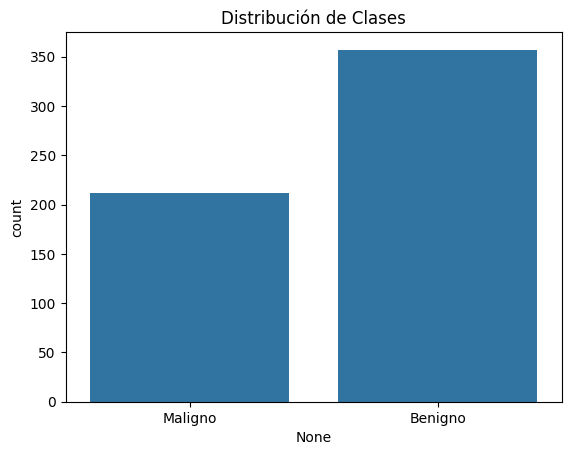

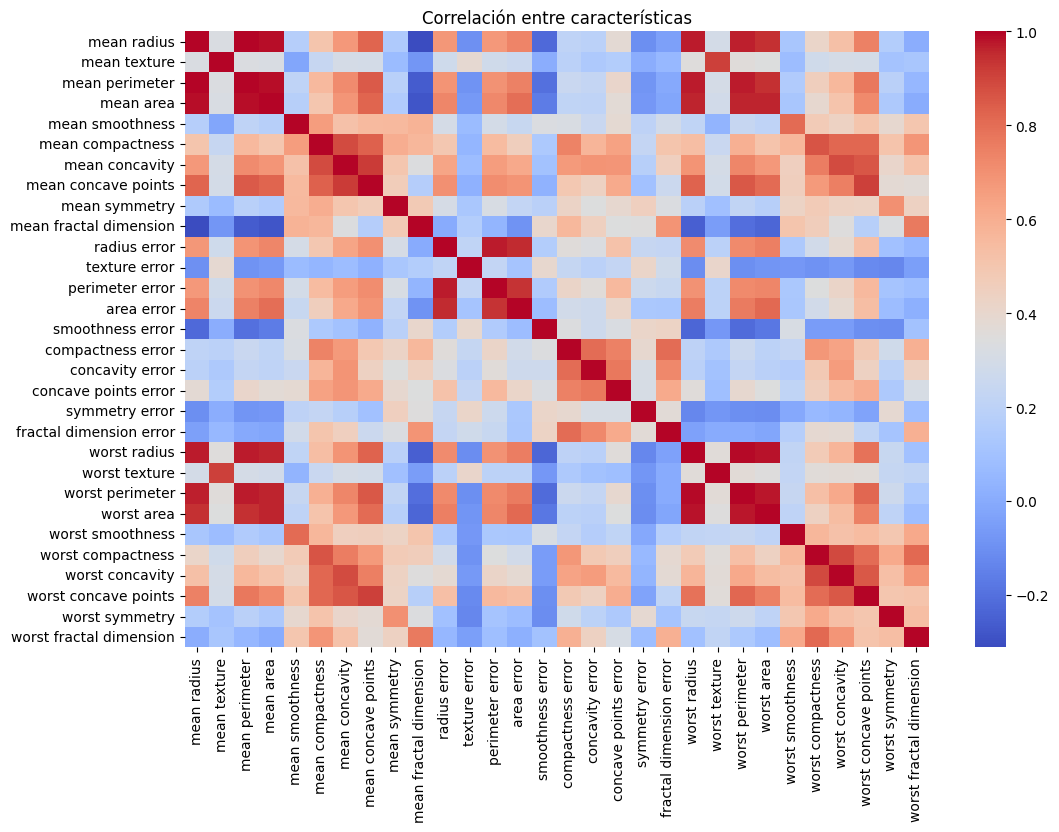

In [3]:
# 📊 2. Análisis Exploratorio
# Distribución de clases
sns.countplot(x=y.map({0: "Maligno", 1: "Benigno"}))
plt.title("Distribución de Clases")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title("Correlación entre características")
plt.show()


In [4]:
# 🌲 3. Entrenamiento inicial con Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [5]:
# ⚙️ 4. Optimización de Hiperparámetros con GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Precisión en test set:", grid.score(X_test, y_test))


Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Precisión en test set: 0.9649122807017544


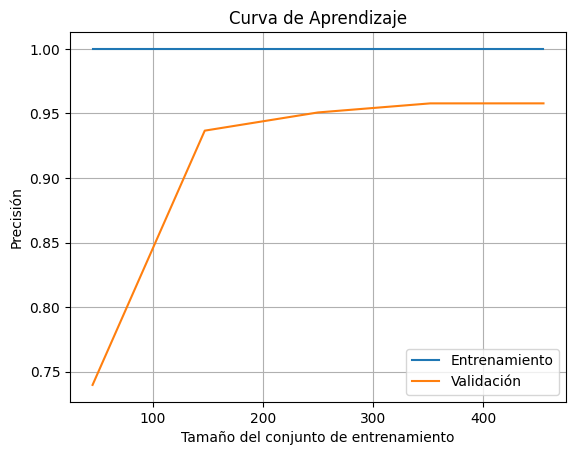

In [6]:
# 📈 5. Curva de Aprendizaje
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    grid.best_estimator_, X, y, cv=5, scoring='accuracy')

plt.plot(train_sizes, train_scores.mean(axis=1), label="Entrenamiento")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validación")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.title("Curva de Aprendizaje")
plt.legend()
plt.grid(True)
plt.show()


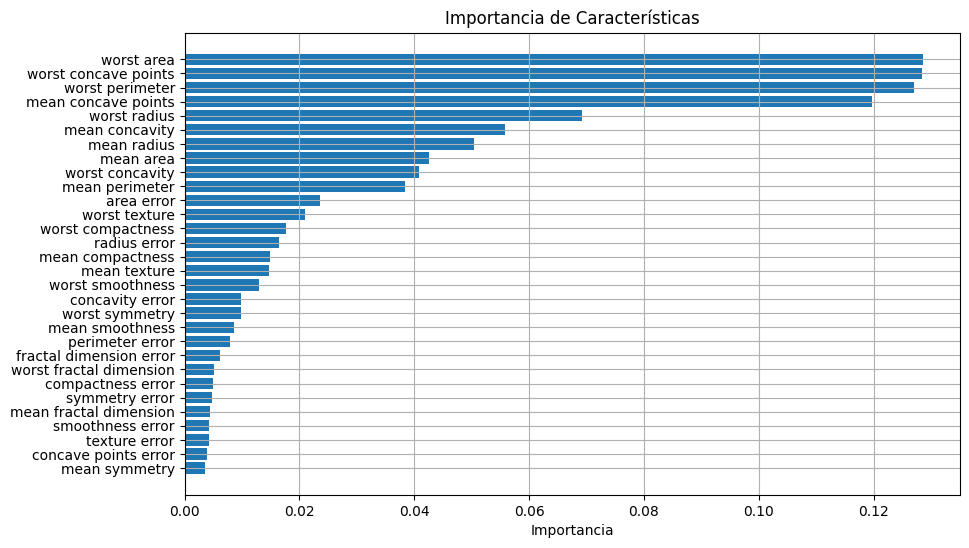

In [7]:
# 🔍 6. Importancia de Características
importancias = grid.best_estimator_.feature_importances_
indices = np.argsort(importancias)

plt.figure(figsize=(10, 6))
plt.barh(X.columns[indices], importancias[indices])
plt.title("Importancia de Características")
plt.xlabel("Importancia")
plt.grid(True)
plt.show()


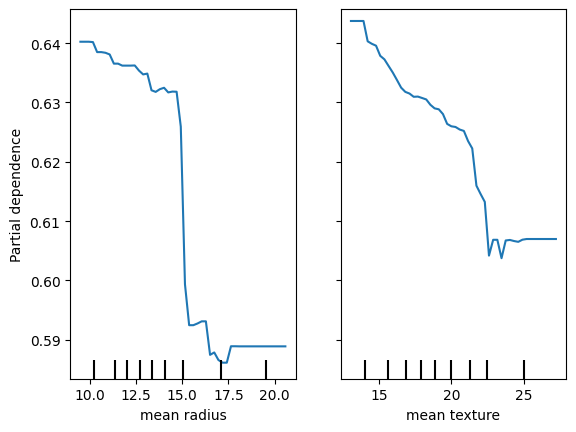

In [8]:
# 📊 7. Partial Dependence Plots (PDP)
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(
    grid.best_estimator_, X, [0, 1], feature_names=X.columns, grid_resolution=50
)
plt.show()
